In [1]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
from itertools import permutations
import numpy as np
import random
#np.random.seed(0)
class ttt():
    metadata = {"start":[1,2]}

    def __init__(self, start=None):
        self.board = [0]*9
        self.win = -1
        self.lr = 0.5
        # 0 - Empty
        # 5 - X (Agent)
        # 7 - O (Opponent)
        self.q_init()
        assert start is None or start in self.metadata["start"]
        self.start = start
    def act(self,move=None):
        if self.board[move] == 0:
            self.board[move] = 5
            self.win = self.check_win()
        else:
            #print("The Move is Not Valid")
            x = int(input("Enter any other Move: "))
            self.act(x)
    def print(self):
        for i in range(9):
            if self.board[i] == 0:
                print("|   |",end=" ")
            elif self.board[i] == 5:
                print("| X |",end=" ")
            else:
                print("| O |",end=" ")
            if i%3 == 2:
                print()
    def check_win(self):
        b = self.board
        l = []
        for i in range(3):
            l.append(b[i]+b[i+3]+b[i+6])
            l.append(b[3*i]+b[3*i+1]+b[3*i+2])
        l.append(b[0]+b[4]+b[8])
        l.append(b[2]+b[4]+b[6])

        for i in l:
            if i == 15:
                self.win = 1
                return 1 #"AGENT WIN"
            elif i == 21:
                self.win = 0
                return 0 #"OPPONENT WIN"
        count = 0
        for i in b:
            if i != 0:
                count += 1
        if count == 9:
            return -2 #"TIE"
        return -1#"CONTINUE"
    def random_opponent(self):
        l = []
        for i in range(9):
            if self.board[i] == 0:
                l.append(i)
        self.board[random.choice(l)] = 7
        self.win = self.check_win()
    def fun(self,i,j):
        board = self.board
        out = -1
        if i == 0:
            if (j == 1 and board[2] == 0):
                out = 2
            elif(j == 2 and board[1] == 0):
                out = 1
            elif(j == 3 and board[6] == 0):
                out = 6
            elif(j == 4 and board[8] == 0):
                out = 8
            elif(j == 6 and board[3] == 0):
                out = 3
            elif(j == 8 and board[4] == 0):
                out = 4
        elif i == 1:
            if (j == 2 and board[0] == 0):
                out = 0
            elif(j == 4 and board[7] == 0):
                out = 7
            elif(j == 7 and board[4] == 0):
                out = 4
        elif i == 2:
            if (board[6] == 0 and j == 4):
                out = 6
            elif(board[8] == 0 and j == 5):
                out = 8
            elif(board[4] == 0 and j == 6):
                out = 4
            elif(board[5] == 0 and j == 8):
                out = 5
        elif i == 3:
            if (board[5] == 0 and j == 4):
                out = 5
            elif(board[4] == 0 and j == 5):
                out = 4
            elif(board[0] == 0 and j == 6):
                out = 0
        elif i == 4:
            if (board[3] == 0 and j == 5):
                out = 3
            elif(board[1] == 0 and j == 7):
                out = 1
            elif(board[0] == 0 and j == 8):
                out = 0
        elif i == 5:
            if (board[2] == 0 and j == 8):
                out = 2
        elif i == 6:
            if (board[8] == 0 and j == 7):
                out = 8
            elif(board[7] == 0 and j == 8):
                out = 7
        elif i == 7:
            if (board[6] == 0 and j == 8):
                out = 6
        return out
                
    def safe_opponent(self):
        l = []
        flag1 = 1
        flag2 = 1
        pos = -1
        for i in range(9):
            if self.board[i] == 7:
                l.append(i)
        if len(l) > 1:
            for a in range(len(l)):
                i = l[a]
                for b in range(a+1,len(l)):
                    # 12 13 14 15 17 19
                    # 23 25 28
                    # 357 369 375 396
                    # 456 465 471
                    # 564 582 591
                    # 693
                    # 789 798
                    # 897
                    j = l[b]
                    x = self.fun(i,j)
                    if x > -1:
                        pos = x
                        flag1 = 0
                        self.board[pos] = 7
                        self.win = 0
                        return "OPPONENT WIN"
                """else:
                    continue
                break"""
        if flag1:
            l = []
            for i in range(9):
                if self.board[i] == 5:
                    l.append(i)
            if len(l) > 1:
                for a in range(len(l)):
                    i = l[a]
                    for b in range(a+1,len(l)):
                        j = l[b]
                        x = self.fun(i,j)
                        if x > -1:
                            pos = x
                            flag2 = 0
                            self.board[pos] = 7
                            self.win = self.check_win()
                            return "AGENT WIN"
                    """else:
                        continue
                    break"""
        if flag2:
            l = []
            for i in range(9):
                if self.board[i] == 0:
                    l.append(i)
            pos = random.choice(l)
            self.board[pos] = 7
            self.win = self.check_win()
            return "CONTINUE"
    def q_init(self):
        self.q_table = np.zeros((3,3,3,3,3,3,3,3,3,9))
        """self.q_table = np.random.rand(3,3,3,3,3,3,3,3,3,9)
        self.q_table[1,1,1,:,:,:,:,:,:,:] = 0
        self.q_table[:,:,:,1,1,1,:,:,:,:] = 0
        self.q_table[:,:,:,:,:,:,1,1,1,:] = 0
        self.q_table[1,:,:,1,:,:,1,:,:,:] = 0
        self.q_table[:,1,:,:,1,:,:,1,:,:] = 0
        self.q_table[:,:,1,:,:,1,:,:,1,:] = 0
        self.q_table[1,:,:,:,1,:,:,:,1,:] = 0
        self.q_table[:,:,1,:,1,:,1,:,:,:] = 0
        
        self.q_table[2,2,2,:,:,:,:,:,:,:] = 0
        self.q_table[:,:,:,2,2,2,:,:,:,:] = 0
        self.q_table[:,:,:,:,:,:,2,2,2,:] = 0
        self.q_table[2,:,:,2,:,:,2,:,:,:] = 0
        self.q_table[:,2,:,:,2,:,:,2,:,:] = 0
        self.q_table[:,:,2,:,:,2,:,:,2,:] = 0
        self.q_table[2,:,:,:,2,:,:,:,2,:] = 0
        self.q_table[:,:,2,:,2,:,2,:,:,:] = 0
        l1 = set(permutations([1,1,1,1,1,2,2,2,2]))
        l2 = set(permutations([1,1,1,1,2,2,2,2,2]))
        l = l1.union(l2)
        for i in l:
            p = list(i)
            for j in range(9):
                x = p.copy()
                x.append(j)
                self.q_table[tuple(x)] = 0"""
        #print(self.q_table[1,1,1,0,0,0,1,0,0,:])        
    def reset(self):
        self.board = [0]*9
        self.win = -1
    def epsilon_greedy(self,state,epsilon):
        # state is a list
        p = np.random.uniform(0,1)
        if p >= epsilon:
            m = -1
            l = []
            for i in range(9):
                if self.board[i] == 0:
                    l.append(i)
            i_max = l[0]
            for i in l:
                #print(self.q_table())
                x = state.copy()
                x.append(i)
                if self.q_table[tuple(x)] >= m:
                    i_max = i
                    m = self.q_table[tuple(x)]
            return i_max
        else:
            l = []
            for i in range(9):
                if self.board[i] == 0:
                    l.append(i)
            return random.choice(l)
    def get_greedy(self,action,state):
        m = -1
        l = []
        for i in range(9):
            if self.board[i] == 0:
                l.append(i)
        if len(l) < 1:
            i_max = action
        else:
            i_max = l[0]
        for i in l:
            #print(self.q_table())
            x = state.copy()
            x.append(i)
            p = self.q_table[tuple(x)]
            if p >= m:
                i_max = i
                m = p
        return i_max
    def q_update(self,reward,s,a,s_1,lr=0.5,gamma=0.9):
        l = s.copy()
        l.append(a)
        l1 = s_1.copy()
        a_1 = self.get_greedy(action=a,state=s_1)
        l1.append(a_1)
        self.q_table[tuple(l)] += lr*(reward + gamma*(self.q_table[tuple(l1)]) - self.q_table[tuple(l)])
    def board_to_state(self):
        l = []
        b = self.board
        # 1 - Agent
        # 5 - Opponent
        for i in b:
            if i == 5:
                l.append(1)
            elif i == 7:
                l.append(2)
            else:
                l.append(i)
        return l
    def play(self,games=1,agent="random"):
        # First training agent against random opponent
        wins = 0
        ties = 0
        loses = 0
        game_results = []
        wins_list = []
        # Rewards for Agent
        # 1- Reward for Winning
        # -1 - Reward for Losing
        # 0 - Reward for Tie
        for i in range(1,games+1):
            if i%200 == 0:
                wins_list.append(self.test(games=100,agent=agent)["wins"])
            s = bernoulli.rvs(size=1,p=0.5)[0]
            print("Game ",i)
            # 0 - Agent Start
            # 1 - Opponent Start
            if s == 0:
                while(True):
                    #print("Hi")
                    #print(self.board)
                    l = self.board_to_state()
                    a_current = self.epsilon_greedy(l,epsilon=0.7)
                    self.act(a_current)
                    #print("\nPlaying Agent\n")
                    #self.print()
                    if self.win == 1:
                        self.q_update(reward=1,s=l,a=a_current,s_1=self.board_to_state(),lr=self.lr,gamma=0.9)
                        #print("AGENT WIN")
                        game_results.append(1)
                        wins += 1
                        break
                    if self.win == 0:
                        self.q_update(reward=-1,s=l,a=a_current,s_1=self.board_to_state(),lr=self.lr,gamma=0.9)
                        #print("OPPONENT WIN")
                        game_results.append(0)
                        loses += 1
                        break
                    if self.win == -2: # TIE
                        self.q_update(reward=0.1,s=l,a=a_current,s_1=self.board_to_state(),lr=self.lr,gamma=0.9)
                        #print("BOARD IS FULL, GAME TIE.")
                        game_results.append(-2)
                        ties += 1
                        break
                    if self.win == -1: #C COntinue
                        #print("Continuing")
                        self.q_update(reward=0,s=l,a=a_current,s_1=self.board_to_state(),lr=self.lr,gamma=0.9)
                    if agent == "random":
                        #print("\nPlaying Random Opponent\n")
                        self.random_opponent()
                    elif agent == "safe":
                        #print("\nPlaying Safe Opponent\n")
                        self.safe_opponent()
                    elif agent == "both":
                        q = bernoulli.rvs(size=1,p=0.5)[0]
                        if q>=0.5:
                            self.random_opponent()
                        else:
                            self.safe_opponent()
                    #print()
                    #self.print()
                    if self.win == 1:
                        #print("AGENT WIN")
                        game_results.append(1)
                        wins += 1
                        break
                    if self.win == 0:
                        #print("OPPONENT WIN")
                        game_results.append(0)
                        loses += 1
                        break
                    if self.win == -2:
                        #print("BOARD IS FULL, GAME TIE.")
                        game_results.append(-2)
                        ties += 1
                        break
                self.reset()
            else:
                while(True):
                    if agent == "random":
                        #print("\nPlaying Random Opponent\n")
                        self.random_opponent()
                    elif agent == "safe":
                        #print("\nPlaying Safe Opponent\n")
                        self.safe_opponent()
                    elif agent == "both":
                        q = bernoulli.rvs(size=1,p=0.5)[0]
                        if q>=0.5:
                            self.random_opponent()
                        else:
                            self.safe_opponent()
                    #print()
                    #self.print()
                    if self.win == 1:
                        #print("AGENT WIN")
                        game_results.append(1)
                        wins += 1
                        break
                    if self.win == 0:
                        #print("OPPONENT WIN")
                        game_results.append(0)
                        loses += 1
                        break
                    if self.win == -2:
                        #print("BOARD IS FULL, GAME TIE.")
                        game_results.append(-2)
                        ties += 1
                        break
                    #print("Hi")
                    #print(self.board)
                    l = self.board_to_state()
                    a_current = self.epsilon_greedy(l,epsilon=0.7)
                    self.act(a_current)
                    #print("\nPlaying Agent\n")
                    #self.print()
                    if self.win == 1:
                        #print("AGENT WIN")
                        self.q_update(reward=1,s=l,a=a_current,s_1=self.board_to_state(),lr=self.lr,gamma=0.9)
                        game_results.append(1)
                        wins += 1
                        break
                    if self.win == 0:
                        #print("OPPONENT WIN")
                        self.q_update(reward=-1,s=l,a=a_current,s_1=self.board_to_state(),lr=self.lr,gamma=0.9)
                        game_results.append(0)
                        loses += 1
                        break
                    if self.win == -2:
                        #print("BOARD IS FULL, GAME TIE.")
                        self.q_update(reward=0.1,s=l,a=a_current,s_1=self.board_to_state(),lr=self.lr,gamma=0.9)
                        game_results.append(-2)
                        ties += 1
                        break
                    if self.win == -1: #C COntinue
                        #print("Continuing")
                        self.q_update(reward=0,s=l,a=a_current,s_1=self.board_to_state(),lr=self.lr,gamma=0.9)
                        
                self.reset()
        #print("W:",wins)
        #print("L:",loses)
        #print("T:",ties)
        print(wins_list)
        plt.plot(wins_list)#,[i+1 for i in range(len(wins_list))])
        plt.grid()
        plt.xlabel("Training Epochs(in 200s)")
        plt.ylabel("Wins")
        l = [sum(wins_list[i:i+20])/20 for i in range(0,len(wins_list),20)]
        print(l)
        plt.show()
    def test(self,games=1,agent="random"):
        wins = 0
        ties = 0
        loses = 0
        game_results = []
        # Rewards for Agent
        # 1- Reward for Winning
        # -1 - Reward for Losing
        # 0 - Reward for Tie
        for i in range(games):
            s = bernoulli.rvs(size=1,p=0.5)[0]
            #print("Game ",i+1,"\n")
            # 0 - Agent Start
            # 1 - Opponent Start
            if s == 0:
                while(True):
                    #print("Hi")
                    #print(self.board)
                    l = self.board_to_state()
                    a_current = self.epsilon_greedy(l,epsilon=0.7)
                    self.act(a_current)
                    #print("\nPlaying Agent\n")
                    #self.print()
                    if self.win == 1:
                        #self.q_update(reward=1,s=l,a=a_current,s_1=self.board_to_state(),lr=self.lr,gamma=0.9)
                        #print("AGENT WIN")
                        game_results.append(1)
                        wins += 1
                        break
                    if self.win == 0:
                        #self.q_update(reward=-1,s=l,a=a_current,s_1=self.board_to_state(),lr=self.lr,gamma=0.9)
                        #print("OPPONENT WIN")
                        game_results.append(0)
                        loses += 1
                        break
                    if self.win == -2:
                        #self.q_update(reward=0.1,s=l,a=a_current,s_1=self.board_to_state(),lr=self.lr,gamma=0.9)
                        #print("BOARD IS FULL, GAME TIE.")
                        game_results.append(-2)
                        ties += 1
                        break
                    if agent == "random":
                        #print("\nPlaying Random Opponent\n")
                        self.random_opponent()
                    elif agent == "safe":
                        #print("\nPlaying Safe Opponent\n")
                        self.safe_opponent()
                    elif agent == "both":
                        q = bernoulli.rvs(size=1,p=0.5)[0]
                        if q>=0.5:
                            self.random_opponent()
                        else:
                            self.safe_opponent()
                    #print()
                    #self.print()
                    if self.win == 1:
                        #print("AGENT WIN")
                        game_results.append(1)
                        wins += 1
                        break
                    if self.win == 0:
                        #print("OPPONENT WIN")
                        game_results.append(0)
                        loses += 1
                        break
                    if self.win == -2:
                        #print("BOARD IS FULL, GAME TIE.")
                        game_results.append(-2)
                        ties += 1
                        break
                self.reset()
            else:
                while(True):
                    if agent == "random":
                        #print("\nPlaying Random Opponent\n")
                        self.random_opponent()
                    elif agent == "safe":
                        #print("\nPlaying Safe Opponent\n")
                        self.safe_opponent()
                    elif agent == "both":
                        q = bernoulli.rvs(size=1,p=0.5)[0]
                        if q>=0.5:
                            self.random_opponent()
                        else:
                            self.safe_opponent()
                    #print()
                    #self.print()
                    if self.win == 1:
                        #print("AGENT WIN")
                        game_results.append(1)
                        wins += 1
                        break
                    if self.win == 0:
                        #print("OPPONENT WIN")
                        game_results.append(0)
                        loses += 1
                        break
                    if self.win == -2:
                        #print("BOARD IS FULL, GAME TIE.")
                        game_results.append(-2)
                        ties += 1
                        break
                    ##print("Hi")
                    #print(self.board)
                    l = self.board_to_state()
                    a_current = self.epsilon_greedy(l,epsilon=0.7)
                    self.act(a_current)
                    #print("\nPlaying Agent\n")
                    #self.print()
                    if self.win == 1:
                        #print("AGENT WIN")
                        #self.q_update(reward=1,s=l,a=a_current,s_1=self.board_to_state(),lr=self.lr,gamma=0.9)
                        game_results.append(1)
                        wins += 1
                        break
                    if self.win == 0:
                        #print("OPPONENT WIN")
                        #self.q_update(reward=-1,s=l,a=a_current,s_1=self.board_to_state(),lr=self.lr,gamma=0.9)
                        game_results.append(0)
                        loses += 1
                        break
                    if self.win == -2:
                        #print("BOARD IS FULL, GAME TIE.")
                        #self.q_update(reward=0.1,s=l,a=a_current,s_1=self.board_to_state(),lr=self.lr,gamma=0.9)
                        game_results.append(-2)
                        ties += 1
                        break
                self.reset()
        #print("W:",wins)
        #print("L:",loses)
        #print("T:",ties)
        return {"wins":wins,"loses":loses,"ties":ties}
    


In [2]:
# Epsilon Decay
# LR
# Gamma Value

Game  1
Game  2
Game  3
Game  4
Game  5
Game  6
Game  7
Game  8
Game  9
Game  10
Game  11
Game  12
Game  13
Game  14
Game  15
Game  16
Game  17
Game  18
Game  19
Game  20
Game  21
Game  22
Game  23
Game  24
Game  25
Game  26
Game  27
Game  28
Game  29
Game  30
Game  31
Game  32
Game  33
Game  34
Game  35
Game  36
Game  37
Game  38
Game  39
Game  40
Game  41
Game  42
Game  43
Game  44
Game  45
Game  46
Game  47
Game  48
Game  49
Game  50
Game  51
Game  52
Game  53
Game  54
Game  55
Game  56
Game  57
Game  58
Game  59
Game  60
Game  61
Game  62
Game  63
Game  64
Game  65
Game  66
Game  67
Game  68
Game  69
Game  70
Game  71
Game  72
Game  73
Game  74
Game  75
Game  76
Game  77
Game  78
Game  79
Game  80
Game  81
Game  82
Game  83
Game  84
Game  85
Game  86
Game  87
Game  88
Game  89
Game  90
Game  91
Game  92
Game  93
Game  94
Game  95
Game  96
Game  97
Game  98
Game  99
Game  100
Game  101
Game  102
Game  103
Game  104
Game  105
Game  106
Game  107
Game  108
Game  109
Game  110
Game  11

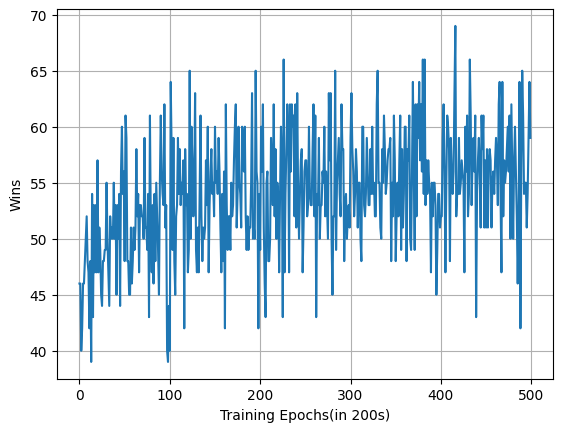

Testing Against Random Opponent
{'wins': 547, 'loses': 375, 'ties': 78}
Testing Against Safe Opponent
{'wins': 66, 'loses': 780, 'ties': 154}
Testing Against Safe and Random Opponent
{'wins': 294, 'loses': 593, 'ties': 113}


In [3]:
a1 = ttt(start=1)
a1.play(games=100000,agent="random")

print("Testing Against Random Opponent")
print(a1.test(games=1000,agent="random"))

print("Testing Against Safe Opponent")
print(a1.test(games=1000,agent="safe"))

print("Testing Against Safe and Random Opponent")
print(a1.test(games=1000,agent="both"))

Game  1
Game  2
Game  3
Game  4
Game  5
Game  6
Game  7
Game  8
Game  9
Game  10
Game  11
Game  12
Game  13
Game  14
Game  15
Game  16
Game  17
Game  18
Game  19
Game  20
Game  21
Game  22
Game  23
Game  24
Game  25
Game  26
Game  27
Game  28
Game  29
Game  30
Game  31
Game  32
Game  33
Game  34
Game  35
Game  36
Game  37
Game  38
Game  39
Game  40
Game  41
Game  42
Game  43
Game  44
Game  45
Game  46
Game  47
Game  48
Game  49
Game  50
Game  51
Game  52
Game  53
Game  54
Game  55
Game  56
Game  57
Game  58
Game  59
Game  60
Game  61
Game  62
Game  63
Game  64
Game  65
Game  66
Game  67
Game  68
Game  69
Game  70
Game  71
Game  72
Game  73
Game  74
Game  75
Game  76
Game  77
Game  78
Game  79
Game  80
Game  81
Game  82
Game  83
Game  84
Game  85
Game  86
Game  87
Game  88
Game  89
Game  90
Game  91
Game  92
Game  93
Game  94
Game  95
Game  96
Game  97
Game  98
Game  99
Game  100
Game  101
Game  102
Game  103
Game  104
Game  105
Game  106
Game  107
Game  108
Game  109
Game  110
Game  11

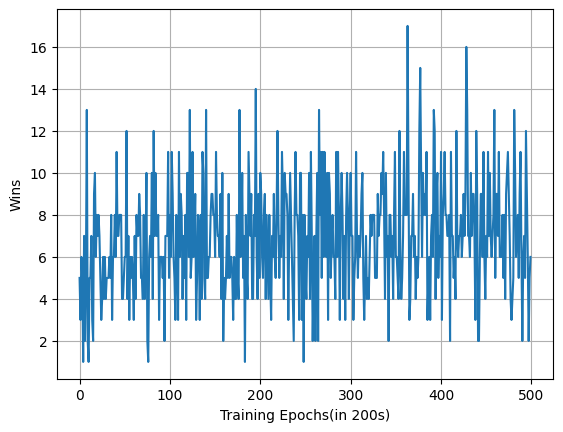

Testing Against Random Opponent
{'wins': 469, 'loses': 405, 'ties': 126}
Testing Against Safe Opponent
{'wins': 84, 'loses': 757, 'ties': 159}
Testing Against Safe and Random Opponent
{'wins': 251, 'loses': 607, 'ties': 142}


In [4]:
a2 = ttt(start=1)
a2.play(games=100000,agent="safe")

print("Testing Against Random Opponent")
print(a2.test(games=1000,agent="random"))

print("Testing Against Safe Opponent")
print(a2.test(games=1000,agent="safe"))

print("Testing Against Safe and Random Opponent")
print(a2.test(games=1000,agent="both"))

Game  1
Game  2
Game  3
Game  4
Game  5
Game  6
Game  7
Game  8
Game  9
Game  10
Game  11
Game  12
Game  13
Game  14
Game  15
Game  16
Game  17
Game  18
Game  19
Game  20
Game  21
Game  22
Game  23
Game  24
Game  25
Game  26
Game  27
Game  28
Game  29
Game  30
Game  31
Game  32
Game  33
Game  34
Game  35
Game  36
Game  37
Game  38
Game  39
Game  40
Game  41
Game  42
Game  43
Game  44
Game  45
Game  46
Game  47
Game  48
Game  49
Game  50
Game  51
Game  52
Game  53
Game  54
Game  55
Game  56
Game  57
Game  58
Game  59
Game  60
Game  61
Game  62
Game  63
Game  64
Game  65
Game  66
Game  67
Game  68
Game  69
Game  70
Game  71
Game  72
Game  73
Game  74
Game  75
Game  76
Game  77
Game  78
Game  79
Game  80
Game  81
Game  82
Game  83
Game  84
Game  85
Game  86
Game  87
Game  88
Game  89
Game  90
Game  91
Game  92
Game  93
Game  94
Game  95
Game  96
Game  97
Game  98
Game  99
Game  100
Game  101
Game  102
Game  103
Game  104
Game  105
Game  106
Game  107
Game  108
Game  109
Game  110
Game  11

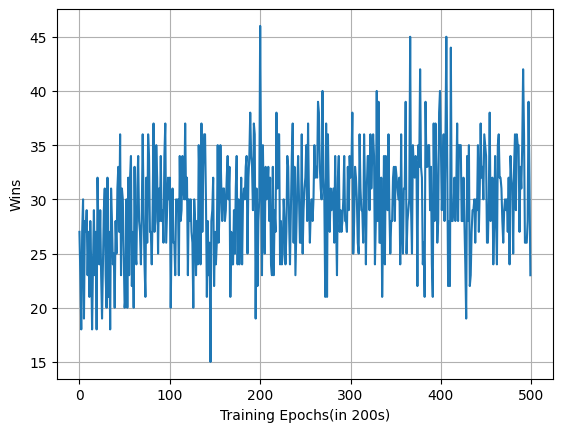

Testing Against Random Opponent
{'wins': 571, 'loses': 339, 'ties': 90}
Testing Against Safe Opponent
{'wins': 63, 'loses': 805, 'ties': 132}
Testing Against Safe and Random Opponent
{'wins': 277, 'loses': 589, 'ties': 134}


In [5]:
a3 = ttt(start=1)
a3.play(games=100000,agent="both")

print("Testing Against Random Opponent")
print(a3.test(games=1000,agent="random"))

print("Testing Against Safe Opponent")
print(a3.test(games=1000,agent="safe"))

print("Testing Against Safe and Random Opponent")
print(a3.test(games=1000,agent="both"))

In [6]:
# Terminal States - Board with 1 Empty Place or 0 Empty Places (Q_init)
# Q VAlues are initialized randomly or not?

Among the three agents, the 3rd agent which is trained against both random and safe opponent is the Best Agent because, it knows how to play with a Safe and also a Random Opponent. This can be concluded from the Testing Results of the 3rd Agent.